<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# Regressão Linear

## 1. Leitura dos dados: (Boston Housing Data)

**Attribute Information:**

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [2]:
!gdown --id 18ZeaqFSAQk25H_S-OQYerJiSer7V_WMU

'gdown' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [ ]:
import pandas as pd

housing = pd.read_csv('housing.csv.data', sep = ';')
housing

## 2. Análise exploratória:

In [3]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NO,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


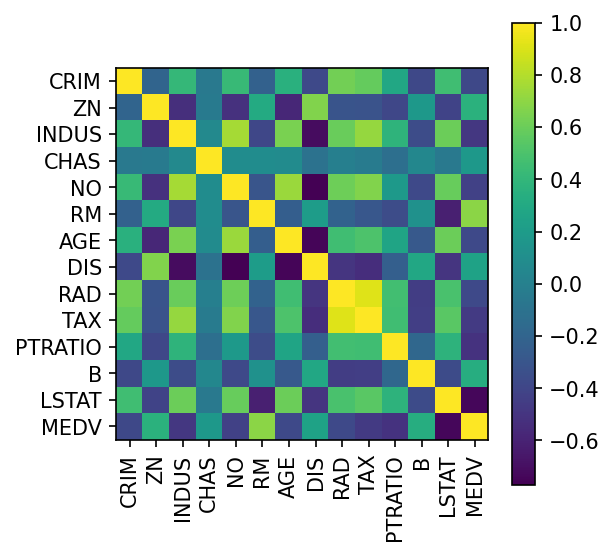

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4, 4), dpi = 150)

corr = housing.corr() # method = 'pearson'

plt.xticks(range(14), labels = corr.columns,rotation=90)
plt.yticks(range(14), labels = corr.columns)

plt.imshow(corr)
plt.colorbar()
plt.show()

In [ ]:
corr

,CRIM,ZN,INDUS,CHAS,NO,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NO,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## 3. Regressão Linear

### 3.1 Divisão dos dados:

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

features = ['RM'] # average number of rooms per dwelling

X = np.array(housing[features])
Y = np.array(housing['MEDV'])

# divisão dos conjuntos de treino (80%) e teste (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 5487)

pd.core.frame.DataFrame(Y_train)

,0
0,43.1
1,16.1
2,20.0
3,15.4
4,21.7
...,...
399,24.7
400,50.0
401,18.2
402,23.9


In [6]:
pd.core.frame.DataFrame(Y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 3.2 Definição da Hipótese:

In [7]:
from sklearn.linear_model import LinearRegression

hipotese = LinearRegression() # y = t0 + t1*x
hipotese.fit(X_train, Y_train) # treinamento do modelo

print(hipotese.intercept_, hipotese.coef_)

-31.292816613399346 [8.5696185]


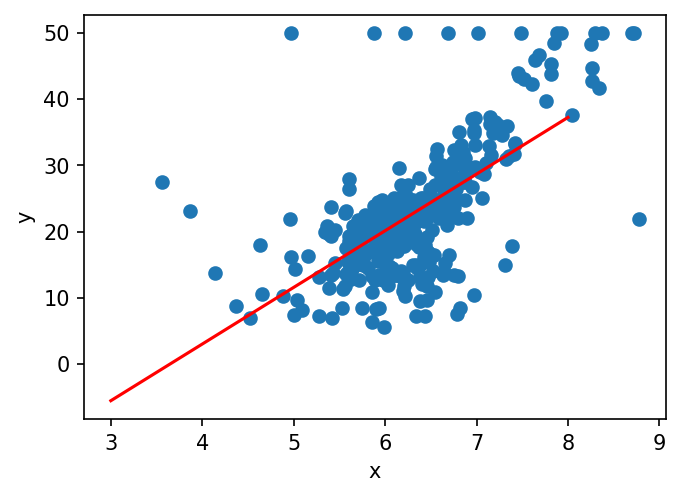

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5, 3.5), dpi = 150)

id = 0

plt.ylabel('y')
plt.xlabel('x')

X_plt = X_train.T
Y_plt = Y_train

model_x = np.linspace(3, 8, 100)
model_y = hipotese.intercept_ + hipotese.coef_[0] * model_x

plt.scatter(X_plt, Y_plt)
plt.plot(model_x, model_y, 'r-')
plt.show()

### 3.3 Métricas:

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [9]:
Y_pred = hipotese.predict(X_test) # previsão do modelo
Y_pred

array([15.43731306, 20.91329928, 36.65568846, 29.44863931, 23.60415949,
       14.1604399 , 13.14922492, 18.25671755, 19.02798321, 35.81586585,
       24.25545049, 18.05961632, 23.64700758, 28.48884203, 18.35955297,
       27.26338659, 28.17176615, 19.75640078, 17.56257845, 28.67737364,
       37.5554984 , 19.79067926, 18.56522381, 20.10775514, 30.02280374,
       20.20202095, 25.22381739, 16.96270515, 24.18689355, 21.55602067,
       21.41890677, 18.52237572, 23.91266575, 24.36685554,  4.16826473,
       29.5857532 , 34.61611926, 10.74973174, 26.36357665, 21.55602067,
       20.3219956 , 30.43414543, 21.17038784, 21.7102738 , 30.2798923 ,
       25.30094395, 25.75513373, 30.75979094, 40.67483954, 22.08733701,
       35.56734691, 21.85595732, 28.75450021, 19.78210964, 18.59950229,
       23.69842529, 14.54607274, 23.34707093, 21.36748906, 17.40832531,
       16.0114775 , 21.7102738 , 17.29692027, 21.42747639, 19.62785651,
       11.6581113 , 10.72402289, 22.85860268, 28.81448754, 22.67

In [ ]:
from sklearn.metrics import r2_score

# avalia o modelo no conjunto de teste
print("r2 =", r2_score(Y_test, Y_pred)) # compara as previsões do modelo com os valores reais


r2= 0.64017932218134


# Regressão com várias variáveis

${\displaystyle h(\mathbf {x})=\beta _{0}+\beta _{1}x_{1}+\cdots +\beta _{m}x_{m}}$

${\displaystyle h(\mathbf {x})=\beta_0 +\mathbf {x}^{\mathsf {T}}{\boldsymbol {\beta }}}$


In [10]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NO', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

features = ['CRIM','ZN','INDUS','CHAS','NO','RM','AGE','DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT']

X = np.array(housing[features])
Y = np.array(housing['MEDV'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 5487)

pd.core.frame.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
from sklearn.linear_model import LinearRegression

hipotese = LinearRegression()
hipotese.fit(X_train, Y_train)

print(hipotese.intercept_, hipotese.coef_)

42.99735131806869 [-1.02501514e-01  5.51906180e-02  3.85468600e-02  3.21940444e+00
 -2.12126834e+01  3.14133513e+00  3.22446643e-04 -1.61940396e+00
  3.38088677e-01 -1.25136435e-02 -8.82555232e-01  6.75516712e-03
 -5.97013441e-01]


In [13]:
(X_train @ hipotese.coef_.T).shape

(404,)

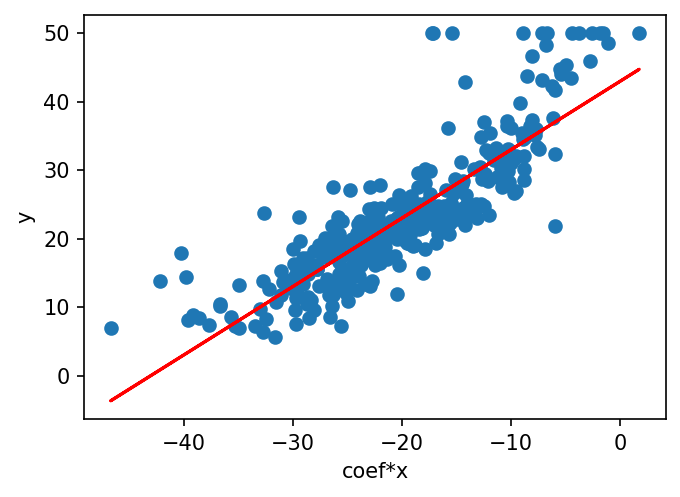

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5, 3.5), dpi = 150)

id = 0

plt.ylabel('y')
plt.xlabel('coef*x')

X_plt = X_train @ hipotese.coef_.T
Y_plt = Y_train

model_x = X_plt
model_y = hipotese.intercept_ + X_plt

plt.scatter(X_plt, Y_plt)
plt.plot(model_x, model_y, 'r-')
plt.show()

In [15]:
from sklearn.metrics import r2_score

Y_pred = hipotese.predict(X_test)
print("r2 =", r2_score(Y_test, Y_pred))

r2 = 0.7910786089500211
